In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [11]:
data=yf.download('BTC-USD',period='1y',interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-29,39768.617188,39887.269531,38235.535156,38609.824219,38609.824219,30882994649
2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,23895713731
2022-05-01,37713.265625,38627.859375,37585.789062,38469.093750,38469.093750,27002760110
2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
...,...,...,...,...,...,...
2023-04-25,27514.873047,28371.078125,27207.931641,28307.597656,28307.597656,17733373139
2023-04-26,28300.058594,29995.837891,27324.548828,28422.701172,28422.701172,31854242019
2023-04-27,28428.464844,29871.546875,28402.886719,29473.787109,29473.787109,27153445027


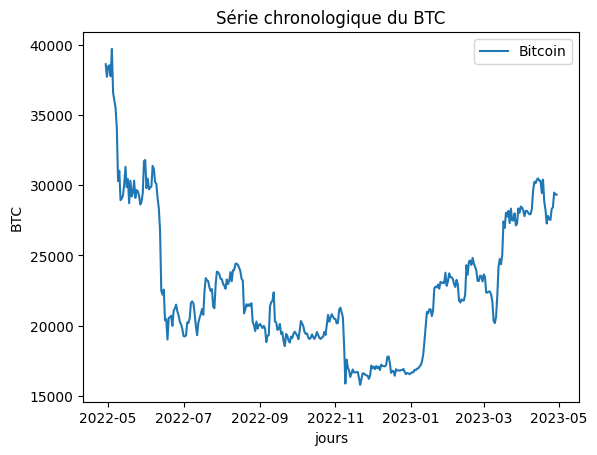

In [12]:
fig, ax = plt.subplots()
ax.plot(data.index, data['Close'], label='Bitcoin')
ax.set_title('Série chronologique du BTC')
ax.set_xlabel('jours')
ax.set_ylabel('BTC')
ax.legend()
plt.show()

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

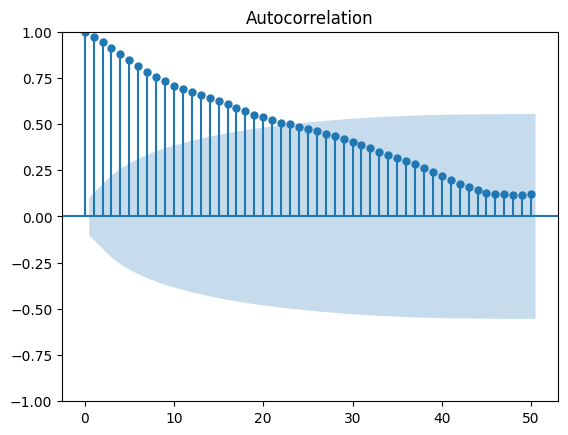

In [14]:
plot_acf(data['Close'], lags=50)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
resultat = adfuller(data['Close'])
#Affichage du résultat 
print(f"Statistique de test : {resultat[0]}")
print(f"P-value : {resultat[1]}")
print("Valeurs critiques :")
for key, value in resultat[4].items():
    print(f"\t{key}: {value}")

Statistique de test : -3.0089475913250485
P-value : 0.0340672147119585
Valeurs critiques :
	1%: -3.4483935212959844
	5%: -2.8694912343676497
	10%: -2.571005879151811


In [17]:
from arch.unitroot import PhillipsPerron

pp_test = PhillipsPerron(data['Close'])
print('Statistique de test :', pp_test.stat)
print('P-value :', pp_test.pvalue)
print('Valeurs critiques :')
for key, value in pp_test.critical_values.items():
    print(f"\t{key}%: {value}")

Statistique de test : -3.0213747105307607
P-value : 0.03294591511707134
Valeurs critiques :
	1%%: -3.4483935212959844
	5%%: -2.8694912343676497
	10%%: -2.571005879151811


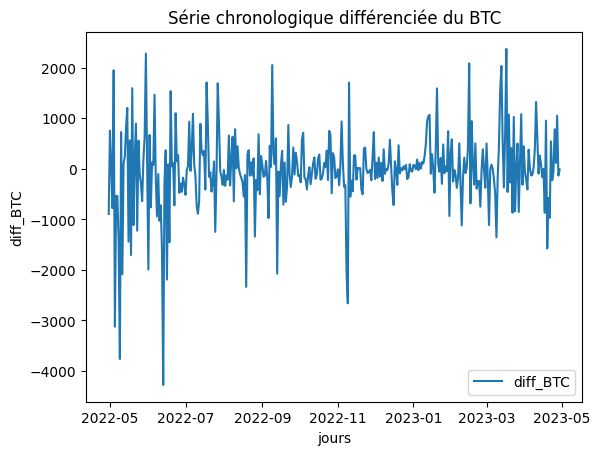

In [18]:
# Appliquer une différenciation à la série chronologique du BTC
diff_data = data['Close'].diff().dropna()

# Afficher un graphique de la série chronologique différenciée
fig, ax = plt.subplots()
ax.plot(diff_data.index, diff_data, label='diff_BTC')
ax.set_title('Série chronologique différenciée du BTC')
ax.set_xlabel('jours')
ax.set_ylabel('diff_BTC')
ax.legend()
plt.show()

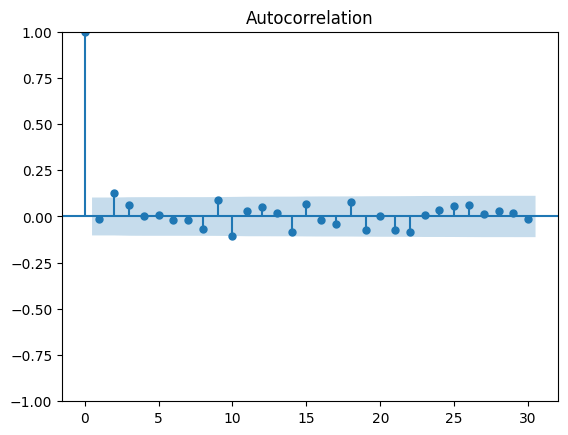

c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


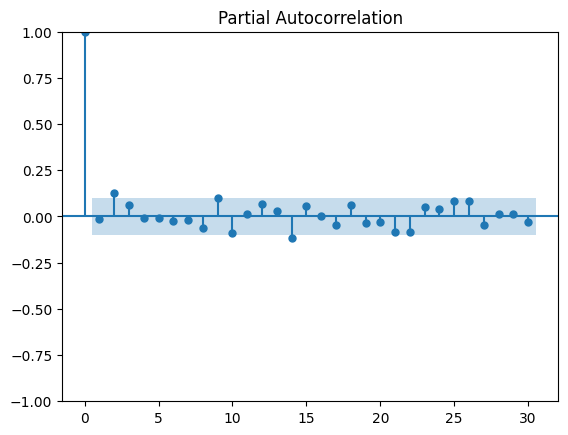

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graphique d'autocorrélations simples
plot_acf(diff_data, lags=30)
plt.show()

# Graphique d'autocorrélations partielles
plot_pacf(diff_data, lags=30)
plt.show()

In [25]:
import numpy as np
train_size = int(len(diff_data) * 0.8)
train, test = diff_data[:train_size], diff_data[train_size:]
p_max = 4
q_max = 4
best_aic = np.inf 
for p in range(p_max+1):
    for q in range(q_max+1):
        try:
            model = ARIMA(train, order=(p,1,q))
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p,1,q)
        except:
            continue

print('Best ARIMA{} model - AIC:{}'.format(best_order, best_aic))

# Ajuster le modèle ARIMA(p,q) avec les données d'entraînement
model = ARIMA(train, order=best_order)
results = model.fit()

# Afficher un résumé des résultats du modèle ajusté
print(results.summary())


c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_mo

Best ARIMA(3, 1, 4) model - AIC:4705.293805540203
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  292
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -2344.647
Date:                Sat, 29 Apr 2023   AIC                           4705.294
Time:                        12:53:42   BIC                           4734.680
Sample:                    04-30-2022   HQIC                          4717.066
                         - 02-15-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5359      0.052    -29.634      0.000      -1.637      -1.434
ar.L2         -1.4624      0.053    -27.408      0.000      -1.567      -1.358
ar

c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


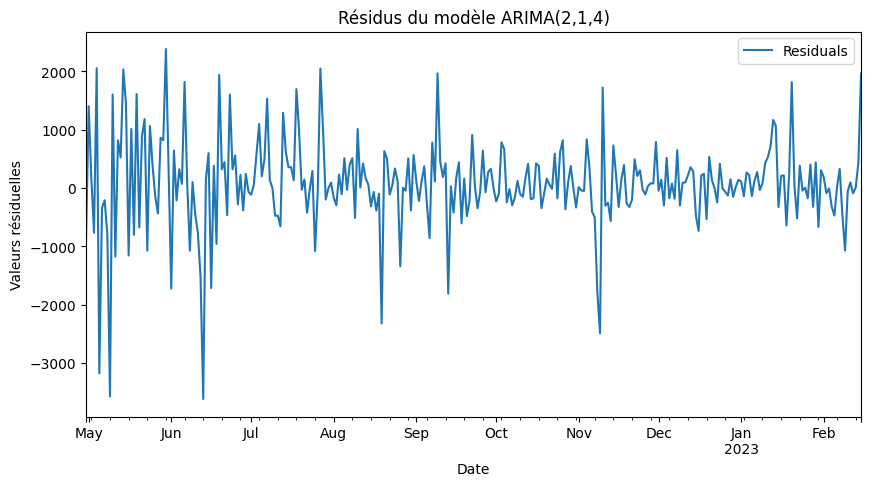

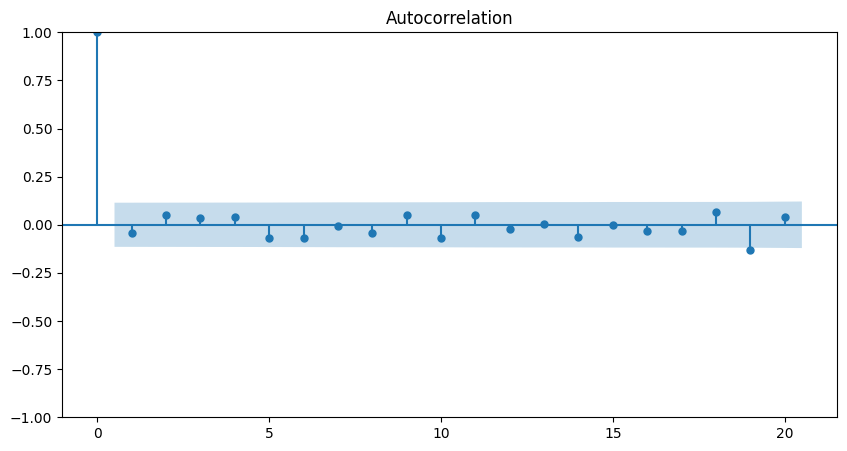

In [26]:
residuals = pd.DataFrame(results.resid, columns=['Residuals'])
fig, ax = plt.subplots(figsize=(10, 5))
residuals.plot(ax=ax)
ax.set(title='Résidus du modèle ARIMA(2,1,4)', ylabel='Valeurs résiduelles')
plt.show()

# Tracer la fonction d'autocorrélation des résidus
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(residuals, ax=ax, lags=20)
plt.show()

In [32]:
n_periods = len(test)
forecast = results.forecast(steps=n_periods)
forecast

2023-02-16     62.273875
2023-02-17    194.950968
2023-02-18     13.341064
2023-02-19    -55.784917
2023-02-20    203.244227
                 ...    
2023-04-25     65.241206
2023-04-26     57.306225
2023-04-27     63.445727
2023-04-28     66.026188
2023-04-29     59.826117
Freq: D, Name: predicted_mean, Length: 73, dtype: float64

In [33]:
mse = ((forecast - test) ** 2).mean()
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 494465.7494825089


[Text(0.5, 1.0, 'Prévisions avec le modèle ARIMA(2,1)')]

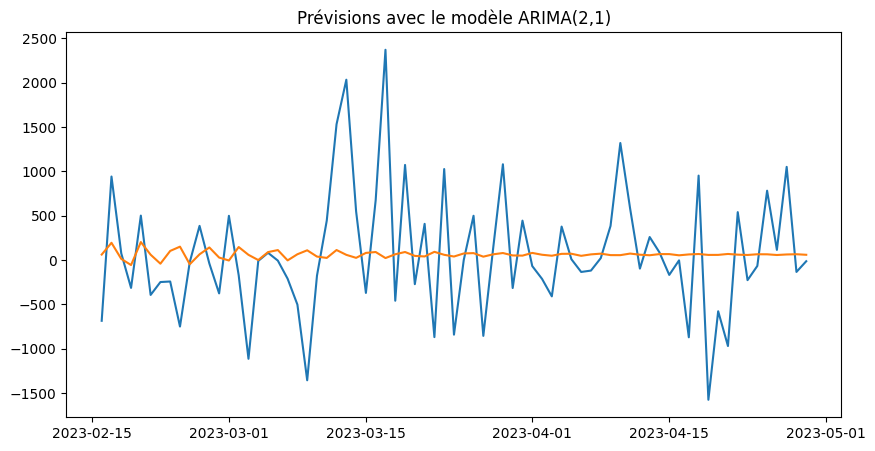

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(test.index, test.values, label='Données de test')
plt.plot(test.index, forecast, label='Prévisions')
ax.set(title='Prévisions avec le modèle ARIMA(2,1)')